In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2025-06-10 13:30:28.547319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749562229.062736      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749562229.188284      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


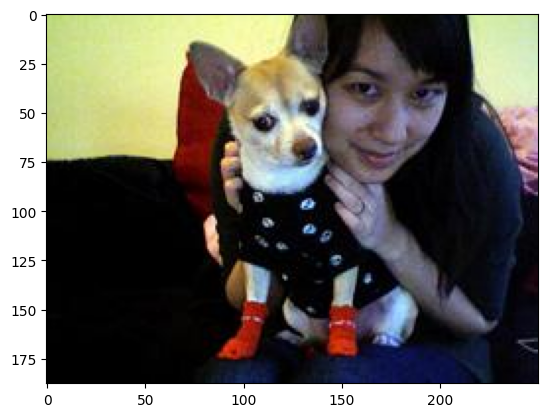

In [2]:
from PIL import Image

image_path = "/kaggle/input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_7.jpg" 

img = Image.open(image_path)

# Show it using matplotlib
plt.imshow(img)

In [6]:
dataset_dir = "/kaggle/input/stanford-dogs-dataset/images/Images"
batch_size = 32
img_height = 224
img_width = 224
validation_split = 0.3
seed = 123

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

num_val_test_batches = tf.data.experimental.cardinality(val_test_ds).numpy()
num_test_batches = int(num_val_test_batches * 0.5) 
val_ds = val_test_ds.skip(num_test_batches)
test_ds = val_test_ds.take(num_test_batches)



Found 20580 files belonging to 120 classes.
Using 14406 files for training.
Found 20580 files belonging to 120 classes.
Using 6174 files for validation.


In [7]:
class_names = train_ds.class_names
num_classes = len(train_ds.class_names)

In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True  
)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,            
    callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1749562331.368403     106 service.cc:148] XLA service 0x7b6814002260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749562331.370245     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749562331.370269     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749562333.496616     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/451 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.0000e+00 - loss: 4.8827   

I0000 00:00:1749562344.593718     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


451/451 ━━━━━━━━━━━━━━━━━━━━ 99s 154ms/step - accuracy: 0.5139 - loss: 2.1988 - val_accuracy: 0.8153 - val_loss: 0.5666
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8080 - loss: 0.5979 - val_accuracy: 0.8327 - val_loss: 0.5248
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.8500 - loss: 0.4739 - val_accuracy: 0.8375 - val_loss: 0.5038
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8767 - loss: 0.3830 - val_accuracy: 0.8504 - val_loss: 0.4895
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8903 - loss: 0.3378 - val_accuracy: 0.8485 - val_loss: 0.4959
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9033 - loss: 0.2911 - val_accuracy: 0.8440 - val_loss: 0.5074
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9102 - loss: 0.2571 - val_accuracy: 0.8414 - val_loss: 0.5324


In [10]:
model.evaluate(test_ds)

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8264 - loss: 0.5797


[0.5431981682777405, 0.8304036259651184]

In [11]:
model.save('model.keras')

In [15]:
maltese_url = "https://teketrek.net/wp-content/uploads/2024/05/%D9%83%D9%84%D8%A8-%D8%A7%D9%84%D9%85%D8%A7%D9%84%D8%B7%D9%8A.webp"
maltese_path = tf.keras.utils.get_file('Maltese', origin=maltese_url)

97714/97714 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [16]:
img = tf.keras.utils.load_img(
    maltese_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [17]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
This image most likely belongs to n02085936-Maltese_dog with a 2.08 percent confidence.
